<a href="https://colab.research.google.com/github/pri538/SQL-Projects/blob/main/SQL_Bike_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
brands = pd.read_csv('/content/brands.csv')
categories = pd.read_csv('/content/categories.csv')
customers = pd.read_csv('/content/customers.csv')
order_items = pd.read_csv('/content/order_items.csv')
orders = pd.read_csv('/content/orders.csv')
products = pd.read_csv('/content/products.csv')
staffs = pd.read_csv('/content/staffs.csv')
stocks = pd.read_csv('/content/stocks.csv')
stores = pd.read_csv('/content/stores.csv')

In [ ]:
db = sql.connect('bike_store.db')

In [ ]:
print("number of rows in brands: " + str(brands.to_sql('brands', db, if_exists='replace', index=False)))
print("number of rows in categories: " + str(categories.to_sql('categories', db, if_exists='replace', index=False)))
print("number of rows in customers: " + str(customers.to_sql('customers', db, if_exists='replace', index=False)))
print("number of rows in order_items: " + str(order_items.to_sql('order_items', db, if_exists='replace', index=False)))
print("number of rows in orders: " + str(orders.to_sql('orders', db, if_exists='replace', index=False)))
print("number of rows in products: " + str(products.to_sql('products', db, if_exists='replace', index=False)))
print("number of rows in staffs: " + str(staffs.to_sql('staffs', db, if_exists='replace', index=False)))
print("number of rows in stocks: " + str(stocks.to_sql('stocks', db, if_exists='replace', index=False)))
print("number of rows in stores: " + str(stores.to_sql('stores', db, if_exists='replace', index=False)))

number of rows in brands: 9
number of rows in categories: 7
number of rows in customers: 1445
number of rows in order_items: 4722
number of rows in orders: 1615
number of rows in products: 321
number of rows in staffs: 10
number of rows in stocks: 939
number of rows in stores: 3


In [ ]:
q1 = '''
SELECT * FROM brands;
'''

df1 = pd.read_sql_query(q1, db)
df1

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [ ]:
#Customers by state
query = """SELECT
    count(*) as customers_by_state,
    state
FROM
    customers
GROUP BY
	state;"""

df = pd.read_sql_query(query, db)
df

,customers_by_state,state
0,284,CA
1,1019,NY
2,142,TX


In [ ]:
#Customers in NY that have phone
query = """SELECT DISTINCT
	first_name,
    last_name,
    phone
FROM
	customers
WHERE
	state IN ('NY')
AND
    phone IS NOT NULL;"""

df = pd.read_sql_query(query, db)
df

,first_name,last_name,phone
0,Latasha,Hays,(716) 986-3359
1,Robby,Sykes,(516) 583-7761
2,Emmitt,Sanchez,(212) 945-8823
3,Theo,Reese,(562) 215-2907
4,Janetta,Aguirre,(717) 670-2634
...,...,...,...
82,Neida,King,(442) 778-1121
83,Johana,Jacobson,(507) 407-9384
84,Mila,Moody,(248) 234-5902
85,Lamar,Bush,(716) 294-7174


In [ ]:
#Number os customers who have a registered phone number vs. who do not
query = """SELECT
    COUNT(CASE WHEN phone IS NOT NULL THEN 1 END) AS customers_with_phone,
    COUNT(CASE WHEN phone IS NULL THEN 1 END) AS customers_without_phone
FROM
    customers;"""

df = pd.read_sql_query(query, db)
df

,customers_with_phone,customers_without_phone
0,178,1267


In [ ]:
#Now by state
query = """
SELECT
    COUNT(CASE WHEN phone IS NOT NULL THEN 1 END) AS customers_with_phone,
    COUNT(CASE WHEN phone IS NULL THEN 1 END) AS customers_without_phone,
    state
FROM
    customers
GROUP BY
	state;  """
df = pd.read_sql_query(query, db)
df

,customers_with_phone,customers_without_phone,state
0,61,223,CA
1,87,932,NY
2,30,112,TX


In [ ]:
#Number os customers per city
query = """
SELECT COUNT(*) number_of_customers,
 city,
 state
FROM
	customers
GROUP BY
	city
ORDER BY
	number_of_customers DESC;"""
df = pd.read_sql_query(query, db)
df

,number_of_customers,city,state
0,20,Mount Vernon,NY
1,17,Scarsdale,NY
2,17,Ballston Spa,NY
3,14,Canandaigua,NY
4,13,Ossining,NY
...,...,...,...
190,2,Far Rockaway,NY
191,1,Yuba City,CA
192,1,Westbury,NY
193,1,Tonawanda,NY


In [ ]:
#What is the most expensive product?
query = """
SELECT
	product_id,
    MAX(list_price)
FROM
	order_items;"""

df = pd.read_sql_query(query, db)
df

,product_id,MAX(list_price)
0,155,11999.99


In [ ]:
#Avg discount

query = """
SELECT
	AVG(discount) as avg_discount
FROM
	order_items;"""

df = pd.read_sql_query(query, db)
df

,avg_discount
0,0.105373


In [ ]:
#Total items sold

query = """
SELECT
    SUM(quantity) AS total_items_ordered
FROM
    order_items;"""

df = pd.read_sql_query(query, db)
df

,total_items_ordered
0,7078


In [ ]:
#Avg discount in dolar

query = """
SELECT
	ROUND(AVG(list_price * discount),1) as AVG_DISCOUNT_USD
FROM
	order_items;"""

df = pd.read_sql_query(query, db)
df

,AVG_DISCOUNT_USD
0,126.7


In [ ]:
#Max discount was 0.2

query = """
SELECT
	product_id,
	discount
FROM
	order_items
WHERE
	discount >= 0.2
ORDER BY
	discount DESC;"""
df = pd.read_sql_query(query, db)
df

,product_id,discount
0,20,0.2
1,4,0.2
2,16,0.2
3,23,0.2
4,8,0.2
...,...,...
1198,236,0.2
1199,101,0.2
1200,213,0.2
1201,197,0.2


In [ ]:
#Avg of the final value of sales greater than 1000
query = """
SELECT
    ROUND(AVG(list_price * ( 1 - discount)),2) AS avg_SALEPRICE_usd
FROM
    order_items
WHERE
	list_price >=1000;
"""
df = pd.read_sql_query(query, db)
df

,avg_SALEPRICE_usd
0,2542.02


In [ ]:
#What is the most sold item and the total value of its sale
query = """
SELECT
    product_id,
    SUM(quantity) AS total_sold,
    ROUND(SUM(list_price * (1 - discount) * quantity),2) AS total_price_w_discount
FROM
    order_items
GROUP BY
    product_id
ORDER BY
    total_sold DESC;"""
df = pd.read_sql_query(query, db)
df

,product_id,total_sold,total_price_w_discount
0,6,167,70371.60
1,13,157,37992.99
2,16,156,82744.62
3,23,154,41011.63
4,7,154,555558.61
...,...,...,...
302,174,1,2559.99
303,170,1,1208.99
304,167,1,712.49
305,157,1,6174.99


In [ ]:
#Order that are delayed
query = """
SELECT
    *,
    CASE WHEN shipped_date > required_date THEN 1
         ELSE 0
         END AS 'shipped_late'
FROM
    orders
LIMIT 20;"""
df = pd.read_sql_query(query, db)
df

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id,shipped_late
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2,0
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6,0
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7,0
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3,1
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6,0
5,6,94,4,2016-01-04,2016-01-07,2016-01-05,2,6,0
6,7,324,4,2016-01-04,2016-01-07,2016-01-05,2,6,0
7,8,1204,4,2016-01-04,2016-01-05,2016-01-05,2,7,0
8,9,60,4,2016-01-05,2016-01-08,2016-01-08,1,2,0
9,10,442,4,2016-01-05,2016-01-06,2016-01-06,2,6,0


In [ ]:
#Counting how many are late

query = """
SELECT
    COUNT(CASE WHEN shipped_late = 1 THEN 1 ELSE NULL END) AS late,
    COUNT(CASE WHEN shipped_late = 0 THEN 1 ELSE NULL END) AS not_late
FROM (
    SELECT
        *,
        CASE WHEN shipped_date > required_date THEN 1
             ELSE 0
        END AS 'shipped_late'
    FROM
        orders
) AS subquery;"""

df = pd.read_sql_query(query, db)
df

,late,not_late
0,458,1157


In [ ]:
#Stock of bikes per store

query = """SELECT
    COUNT(quantity),
    stores.store_name,
    stores.state
FROM
    stocks
INNER JOIN
    stores
ON
    stocks.store_id = stores.store_id
GROUP BY stores.store_id
LIMIT 5;
"""
df = pd.read_sql_query(query, db)
df

,COUNT(quantity),store_name,state
0,313,Santa Cruz Bikes,CA
1,313,Baldwin Bikes,NY
2,313,Rowlett Bikes,TX


In [ ]:
#Name and value of the best-selling product

query = """
SELECT
	ord.product_id,
	sum(quantity) as quant,
    ord.list_price,
    prod.product_name
FROM order_items as ord
INNER JOIN
	products as prod
ON
	ord.product_id = prod.product_id
GROUP BY
	ord.product_id
ORDER BY
	quant DESC;"""

df = pd.read_sql_query(query, db)
df

,product_id,quant,list_price,product_name
0,6,167,469.99,Surly Ice Cream Truck Frameset - 2016
1,13,157,269.99,Electra Cruiser 1 (24-Inch) - 2016
2,16,156,599.99,Electra Townie Original 7D EQ - 2016
3,23,154,299.99,Electra Girl's Hawaii 1 (20-inch) - 2015/2016
4,7,154,3999.99,Trek Slash 8 27.5 - 2016
...,...,...,...,...
302,174,1,3199.99,Trek Domane SLR Disc Frameset - 2018
303,170,1,1299.99,Trek CrossRip 2 - 2018
304,167,1,749.99,Surly ECR Frameset - 2018
305,157,1,6499.99,Trek Domane SL Frameset Women's - 2018


In [ ]:
#Wich vendor sold the largest quantity?

query = """
SELECT COUNT(*) as sold_amount, staff_id
FROM orders
GROUP BY staff_id
ORDER BY sold_amount DESC
LIMIT 3;"""

df = pd.read_sql_query(query, db)
df

,sold_amount,staff_id
0,553,6
1,540,7
2,184,3


In [ ]:
#Their names

query = """
SELECT
	COUNT(orders.order_id) as sold_amount,
	orders.staff_id,
    orders.store_id,
    staffs.first_name,
    staffs.last_name
FROM orders
LEFT JOIN
	staffs
ON
	orders.staff_id = staffs.staff_id
GROUP BY orders.staff_id
ORDER BY sold_amount DESC
LIMIT 3;"""

df = pd.read_sql_query(query, db)
df

,sold_amount,staff_id,store_id,first_name,last_name
0,553,6,2,Marcelene,Boyer
1,540,7,2,Venita,Daniel
2,184,3,1,Genna,Serrano


In [ ]:
q2 = '''
SELECT * FROM categories;
'''

df2 = pd.read_sql_query(q2, db)
df2

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [ ]:
q3 = '''
SELECT * FROM customers;
'''

df3 = pd.read_sql_query(q3, db)
df3

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,None,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127
1,2,Kasha,Todd,None,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008
2,3,Tameka,Fisher,None,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278
3,4,Daryl,Spence,None,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,None,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301
1441,1442,Cassie,Cline,None,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201
1442,1443,Lezlie,Lamb,None,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722
1443,1444,Ivette,Estes,None,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424


In [ ]:
q4 = '''
SELECT * FROM order_items;
'''

df4 = pd.read_sql_query(q4, db)
df4

,order_id,item_id,product_id,quantity,list_price,discount
0,1,1,20,1,599.99,0.20
1,1,2,8,2,1799.99,0.07
2,1,3,10,2,1549.00,0.05
3,1,4,16,2,599.99,0.05
4,1,5,4,1,2899.99,0.20
...,...,...,...,...,...,...
4717,1614,2,159,2,2299.99,0.07
4718,1614,3,213,2,269.99,0.20
4719,1615,1,197,2,2299.99,0.20
4720,1615,2,214,1,899.99,0.07


In [ ]:
q5 = '''
SELECT * FROM orders;
'''

df5 = pd.read_sql_query(q5, db)
df5

,order_id,customer_id,order_status,order_date,required_date,shipped_date,store_id,staff_id
0,1,259,4,2016-01-01,2016-01-03,2016-01-03,1,2
1,2,1212,4,2016-01-01,2016-01-04,2016-01-03,2,6
2,3,523,4,2016-01-02,2016-01-05,2016-01-03,2,7
3,4,175,4,2016-01-03,2016-01-04,2016-01-05,1,3
4,5,1324,4,2016-01-03,2016-01-06,2016-01-06,2,6
...,...,...,...,...,...,...,...,...
1610,1611,6,3,2018-09-06,2018-09-06,None,2,7
1611,1612,3,3,2018-10-21,2018-10-21,None,1,3
1612,1613,1,3,2018-11-18,2018-11-18,None,2,6
1613,1614,135,3,2018-11-28,2018-11-28,None,3,8


In [ ]:
q6 = '''
SELECT * FROM products;
'''

df6 = pd.read_sql_query(q6, db)
df6

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [ ]:
q7 = '''
SELECT * FROM staffs;
'''

df7 = pd.read_sql_query(q7, db)
df7

,staff_id,first_name,last_name,email,phone,active,store_id,manager_id
0,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,(831) 555-5554,1,1,NaN
1,2,Mireya,Copeland,mireya.copeland@bikes.shop,(831) 555-5555,1,1,1.0
2,3,Genna,Serrano,genna.serrano@bikes.shop,(831) 555-5556,1,1,2.0
3,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,(831) 555-5557,1,1,2.0
4,5,Jannette,David,jannette.david@bikes.shop,(516) 379-4444,1,2,1.0
5,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,(516) 379-4445,1,2,5.0
6,7,Venita,Daniel,venita.daniel@bikes.shop,(516) 379-4446,1,2,5.0
7,8,Kali,Vargas,kali.vargas@bikes.shop,(972) 530-5555,1,3,1.0
8,9,Layla,Terrell,layla.terrell@bikes.shop,(972) 530-5556,1,3,7.0
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,(972) 530-5557,1,3,7.0


In [ ]:
q8 = '''
SELECT * FROM stocks;
'''

df8 = pd.read_sql_query(q8, db)
df8

,store_id,product_id,quantity
0,1,1,27
1,1,2,5
2,1,3,6
3,1,4,23
4,1,5,22
...,...,...,...
934,3,309,30
935,3,310,8
936,3,311,23
937,3,312,18


In [ ]:
q9 = '''
SELECT * FROM stores;
'''

df9 = pd.read_sql_query(q9, db)
df9

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


In [ ]:
query1 = '''
SELECT store_name, category_name, SUM(quantity) AS sum_qty
FROM categories
JOIN products ON categories.category_id = products.category_id
JOIN stocks ON products.product_id = stocks.product_id
JOIN stores ON stocks.store_id = stores.store_id
GROUP BY store_name, category_name
ORDER BY store_name, category_name;
'''

result1 = pd.read_sql_query(query1, db)
result1

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


In [ ]:
result1.dtypes

store_name       object
category_name    object
sum_qty           int64
dtype: object

In [ ]:
store = result1['store_name'].unique()
result1['store_name'] = pd.Categorical(result1['store_name'], categories = store, ordered = True)

category = result1['category_name'].unique()
result1['category_name'] = pd.Categorical(result1['category_name'], categories = category, ordered = True)

In [ ]:
result1.dtypes

store_name       category
category_name    category
sum_qty             int64
dtype: object

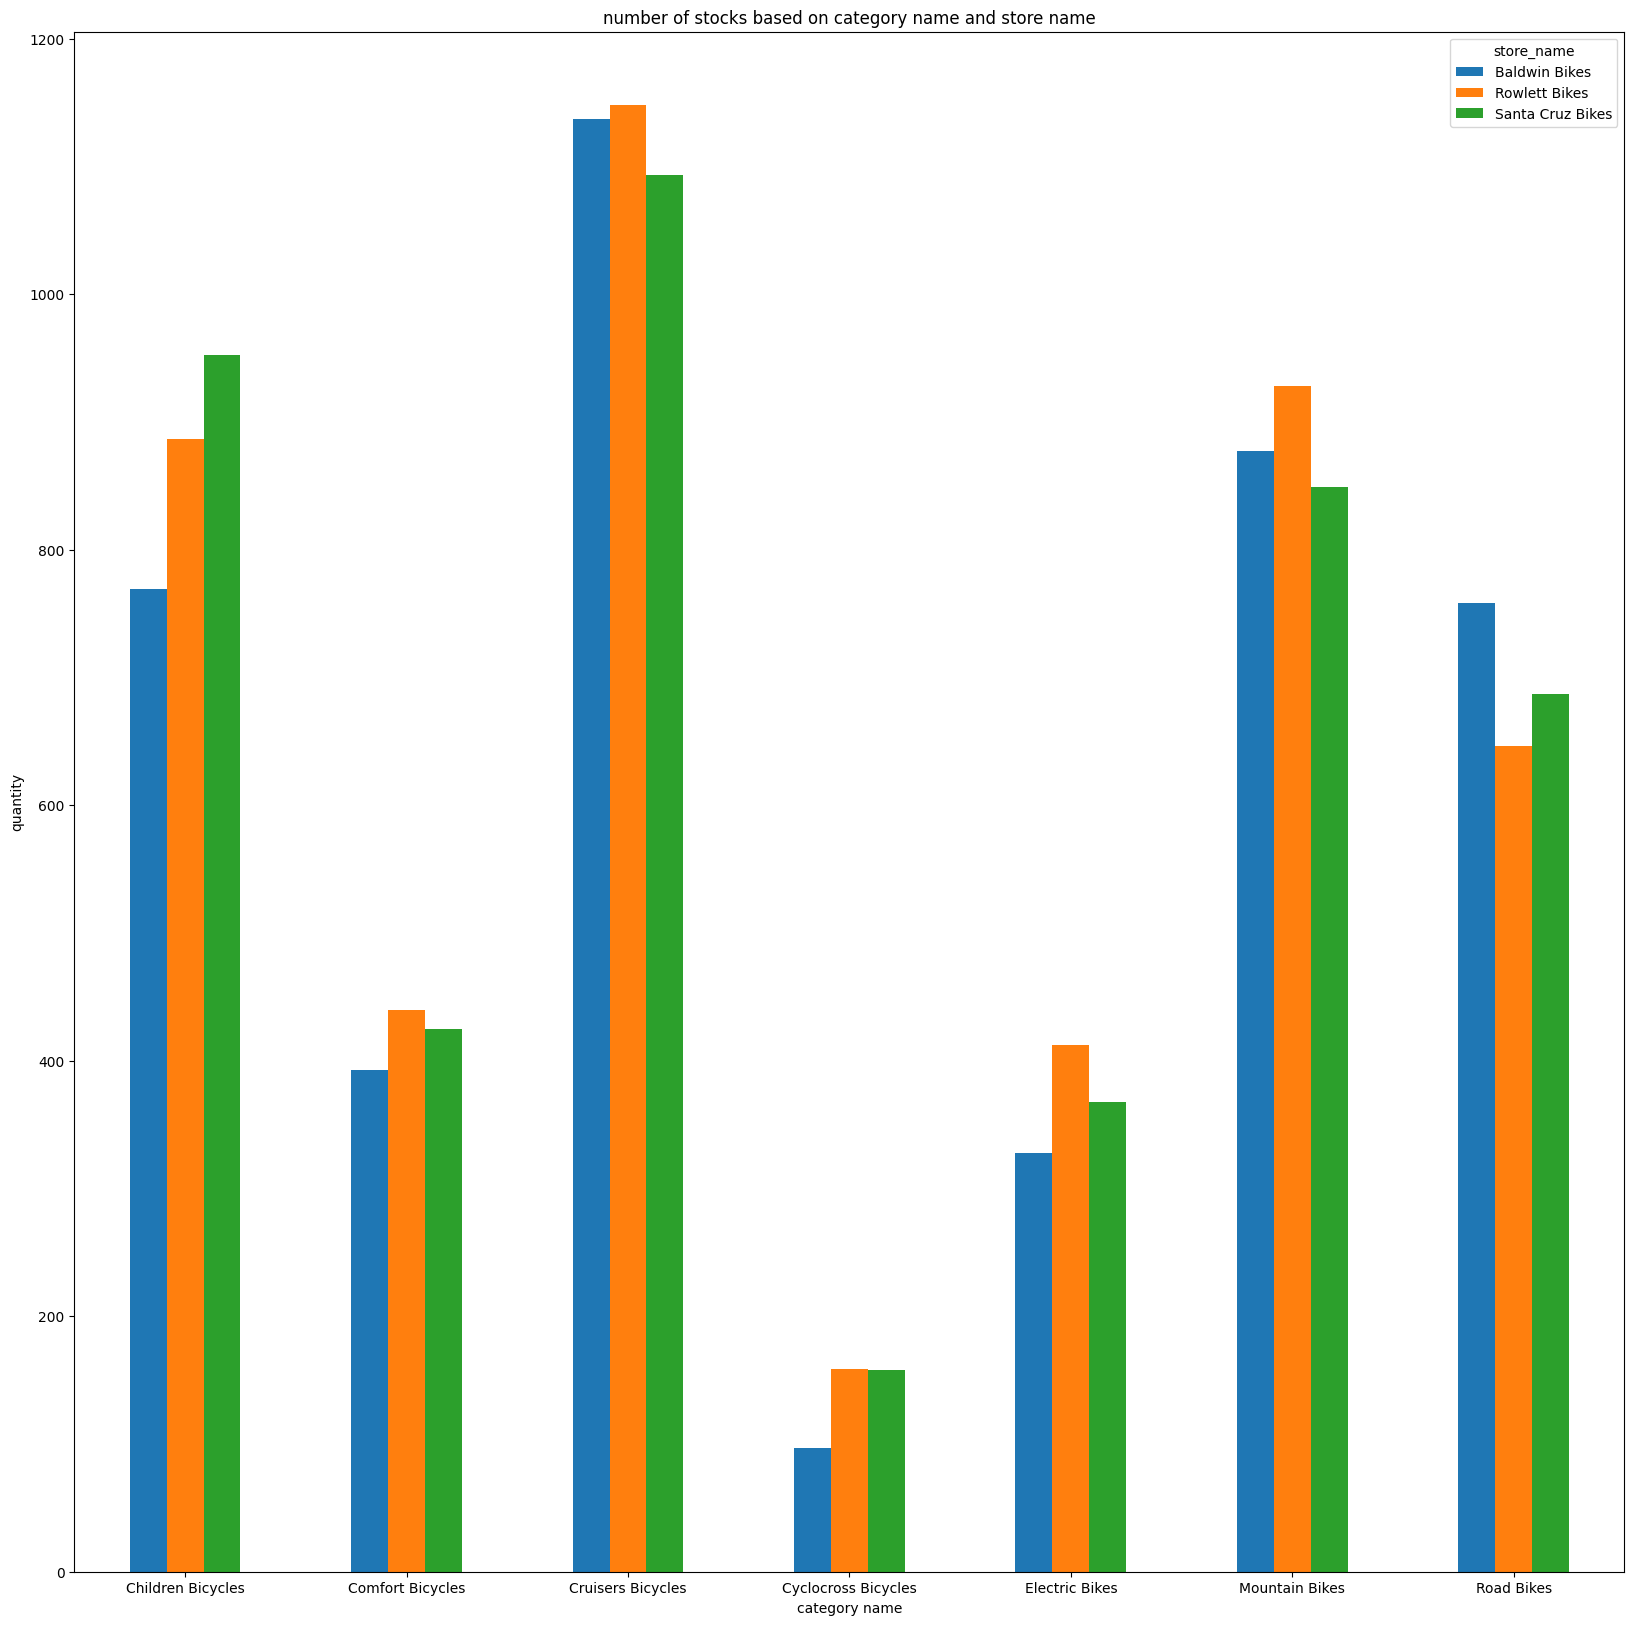

In [ ]:
result1 = result1.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)

ax = result1.plot(kind = 'bar', figsize = (20, 20))
plt.title('number of stocks based on category name and store name')
plt.xlabel('category name')
plt.ylabel('quantity')
plt.xticks(rotation = 0)

plt.show()

In [ ]:
query2 = '''
SELECT store_name, category_name, SUM(quantity) AS sum_qty
FROM categories
JOIN products ON categories.category_id = products.category_id
JOIN order_items ON products.product_id = order_items.product_id
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
GROUP BY store_name, category_name
ORDER BY store_name, category_name;
'''

result2 = pd.read_sql_query(query2, db)
result2

,store_name,category_name,sum_qty
0,Baldwin Bikes,Children Bicycles,811
1,Baldwin Bikes,Comfort Bicycles,555
2,Baldwin Bikes,Cruisers Bicycles,1396
3,Baldwin Bikes,Cyclocross Bicycles,271
4,Baldwin Bikes,Electric Bikes,202
5,Baldwin Bikes,Mountain Bikes,1170
6,Baldwin Bikes,Road Bikes,374
7,Rowlett Bikes,Children Bicycles,117
8,Rowlett Bikes,Comfort Bicycles,87
9,Rowlett Bikes,Cruisers Bicycles,245


In [ ]:
result2.dtypes

store_name       object
category_name    object
sum_qty           int64
dtype: object

In [ ]:
store = result2['store_name'].unique()
result2['store_name'] = pd.Categorical(result2['store_name'], categories = store, ordered = True)

category = result2['category_name'].unique()
result2['category_name'] = pd.Categorical(result2['category_name'], categories = category, ordered = True)

In [ ]:
result2.dtypes

store_name       category
category_name    category
sum_qty             int64
dtype: object

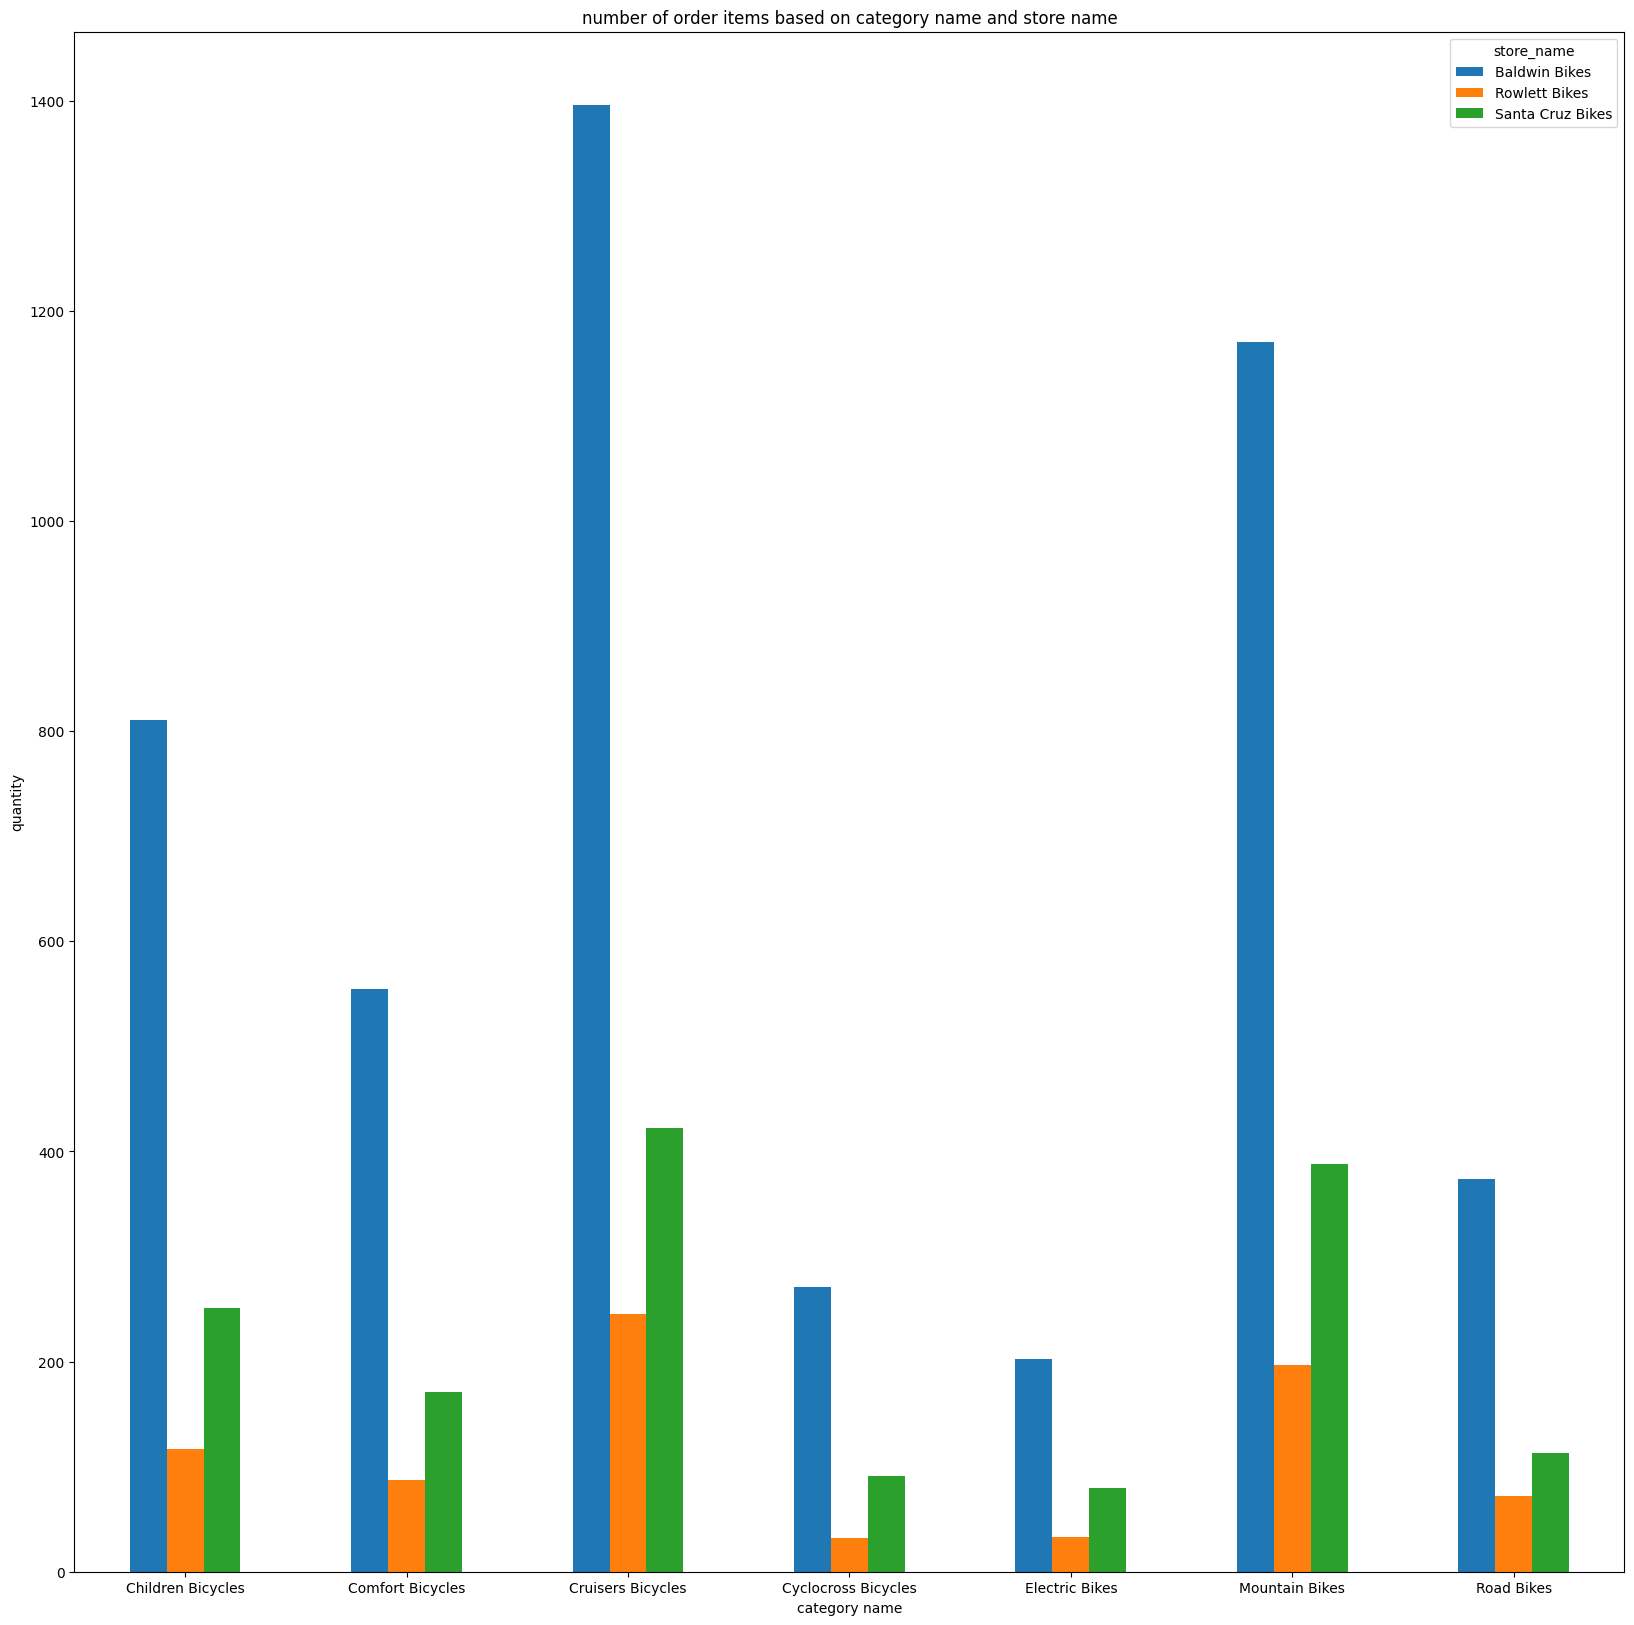

In [ ]:
result2 = result2.groupby(['category_name', 'store_name'])['sum_qty'].sum().unstack().fillna(0)

ax = result2.plot(kind = 'bar', figsize = (20, 20))
plt.title('number of order items based on category name and store name')
plt.xlabel('category name')
plt.ylabel('quantity')
plt.xticks(rotation = 0)

plt.show()

In [ ]:
query3 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Santa Cruz Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result3 = pd.read_sql_query(query3, db)
result3

,year_month,total_price
0,2016 01,71760.3064
1,2016 02,35255.4513
2,2016 03,46817.6251
3,2016 04,34230.6401
4,2016 05,28095.2399
5,2016 06,41554.1683
6,2016 07,21258.8857
7,2016 08,44803.6003
8,2016 09,65159.6319
9,2016 10,69175.4980


In [ ]:
result3.dtypes

year_month      object
total_price    float64
dtype: object

In [ ]:
result3['year_month'] = pd.to_datetime(result3['year_month'], format = '%Y %m')

In [ ]:
result3.dtypes

year_month     datetime64[ns]
total_price           float64
dtype: object

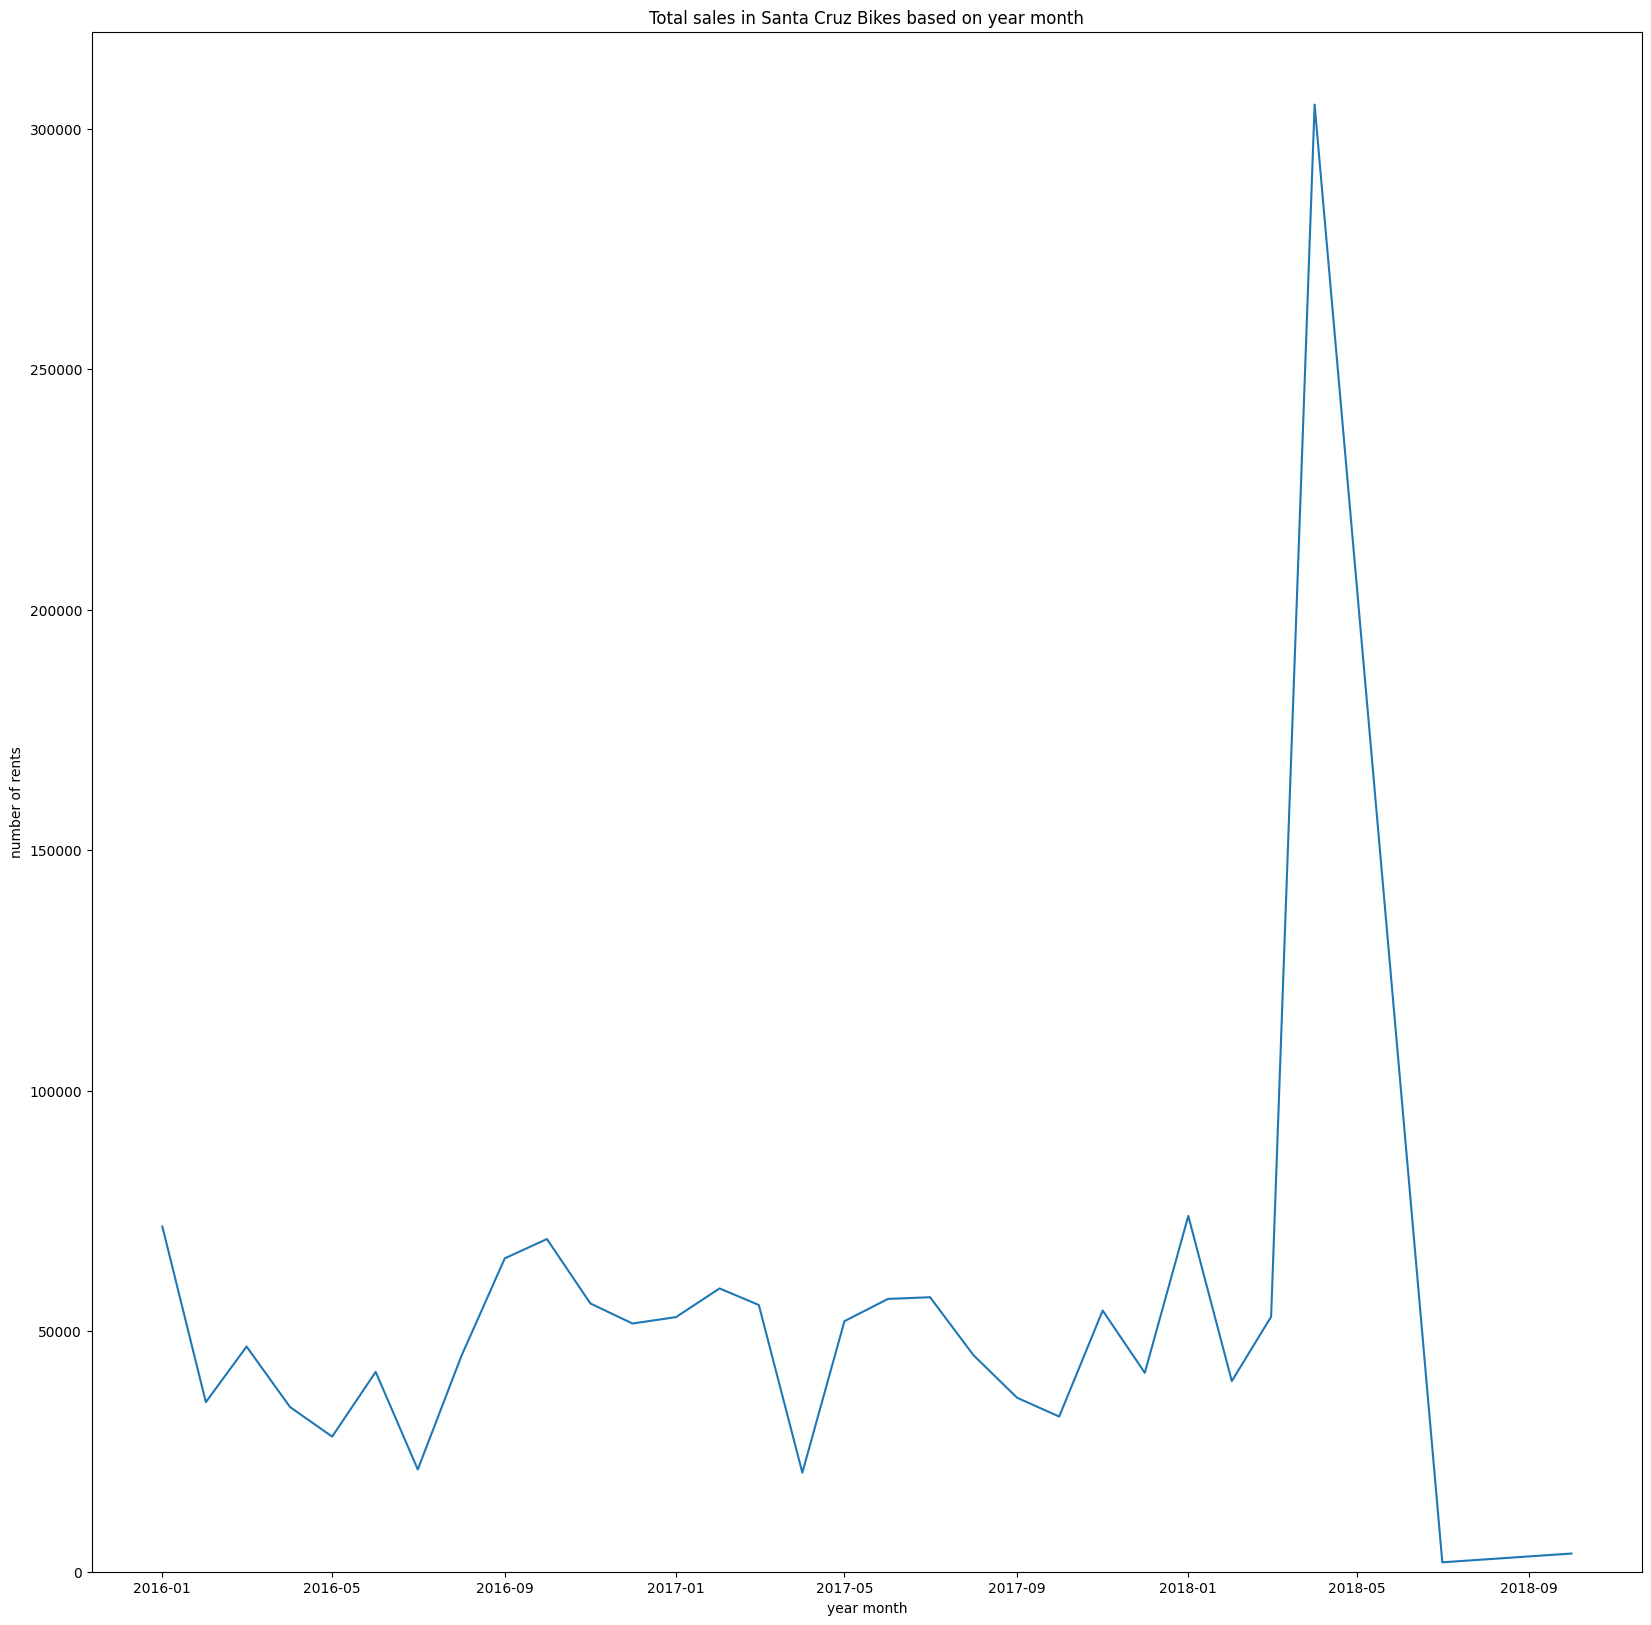

In [ ]:
plt.subplots(figsize=(20, 20))

plt.plot(result3['year_month'], result3['total_price'])
plt.title('Total sales in Santa Cruz Bikes based on year month')
plt.xlabel('year month')
plt.ylabel('number of rents')
plt.ylim(bottom = 0)

plt.show()

In [ ]:
query4 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Baldwin Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result4 = pd.read_sql_query(query4, db)
result4

,year_month,total_price
0,2016 01,132894.2968
1,2016 02,102201.9071
2,2016 03,110338.7916
3,2016 04,120491.9842
4,2016 05,150679.6523
5,2016 06,139021.3866
6,2016 07,167320.8731
7,2016 08,142994.2888
8,2016 09,164368.6516
9,2016 10,129251.7324


In [ ]:
result4.dtypes

year_month      object
total_price    float64
dtype: object

In [ ]:
result4['year_month'] = pd.to_datetime(result4['year_month'], format = '%Y %m')

In [ ]:
result4.dtypes

year_month     datetime64[ns]
total_price           float64
dtype: object

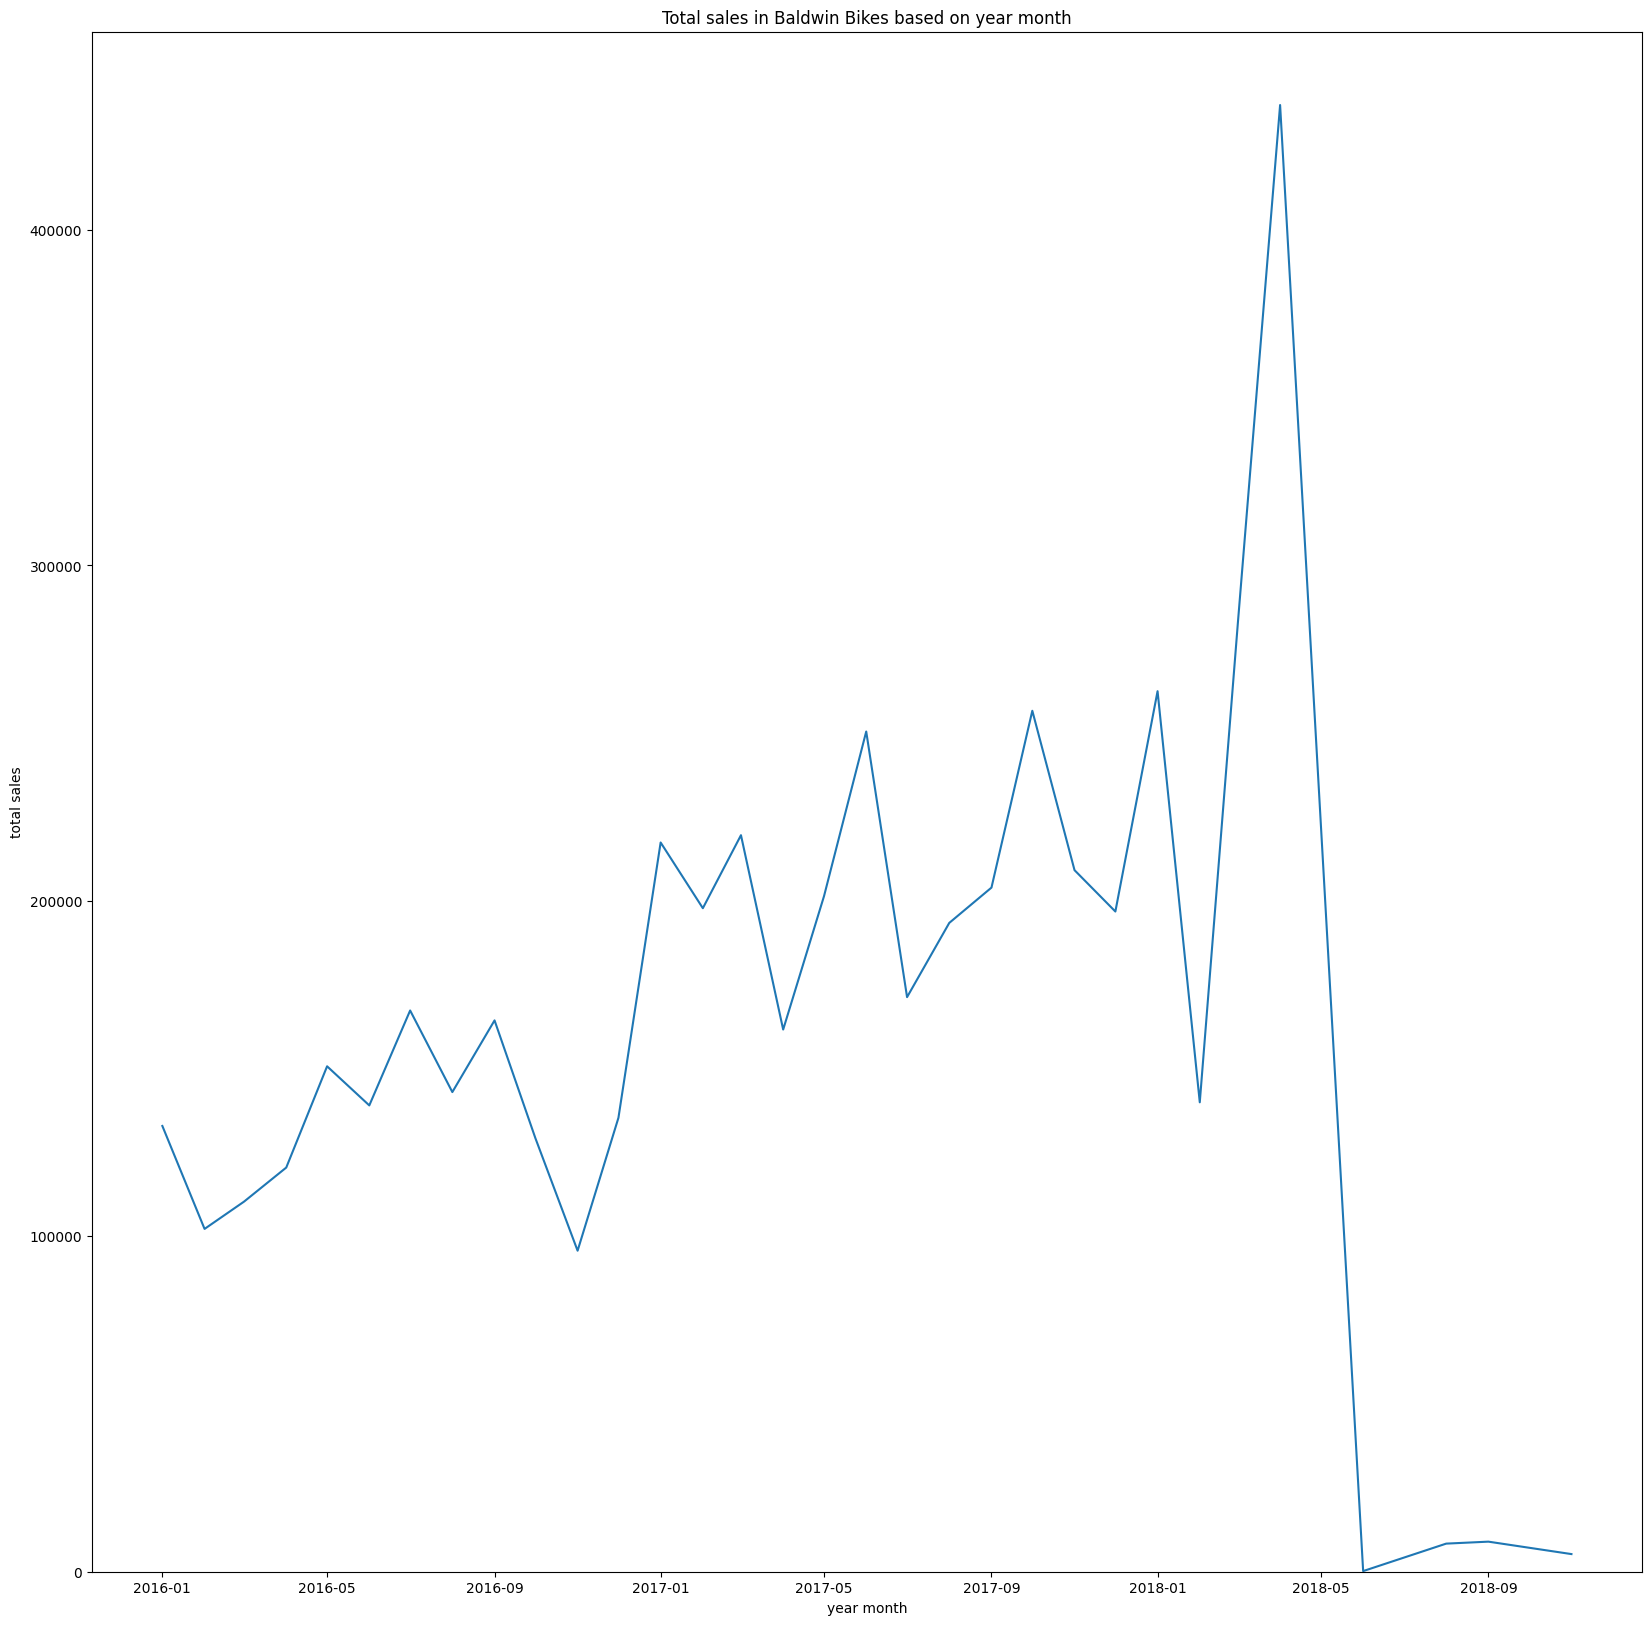

In [ ]:
plt.subplots(figsize=(20, 20))

plt.plot(result4['year_month'], result4['total_price'])
plt.title('Total sales in Baldwin Bikes based on year month')
plt.xlabel('year month')
plt.ylabel('total sales')
plt.ylim(bottom = 0)

plt.show()

In [ ]:
query5 = '''
SELECT STRFTIME('%Y %m', order_date) AS year_month, SUM(quantity * list_price * (1 - discount)) AS total_price
FROM order_items
JOIN orders ON order_items.order_id = orders.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE store_name = 'Rowlett Bikes'
GROUP BY year_month
ORDER BY year_month;
'''

result5 = pd.read_sql_query(query5, db)
result5

,year_month,total_price
0,2016 01,10491.8209
1,2016 02,18654.9644
2,2016 03,23443.9118
3,2016 04,12421.4269
4,2016 05,26495.1169
5,2016 06,29986.5696
6,2016 07,10977.0501
7,2016 08,37859.4876
8,2016 09,43563.3262
9,2016 10,13650.8501


In [ ]:
result5.dtypes

year_month      object
total_price    float64
dtype: object

In [ ]:
result5['year_month'] = pd.to_datetime(result5['year_month'], format = '%Y %m')

In [ ]:
result5.dtypes

year_month     datetime64[ns]
total_price           float64
dtype: object

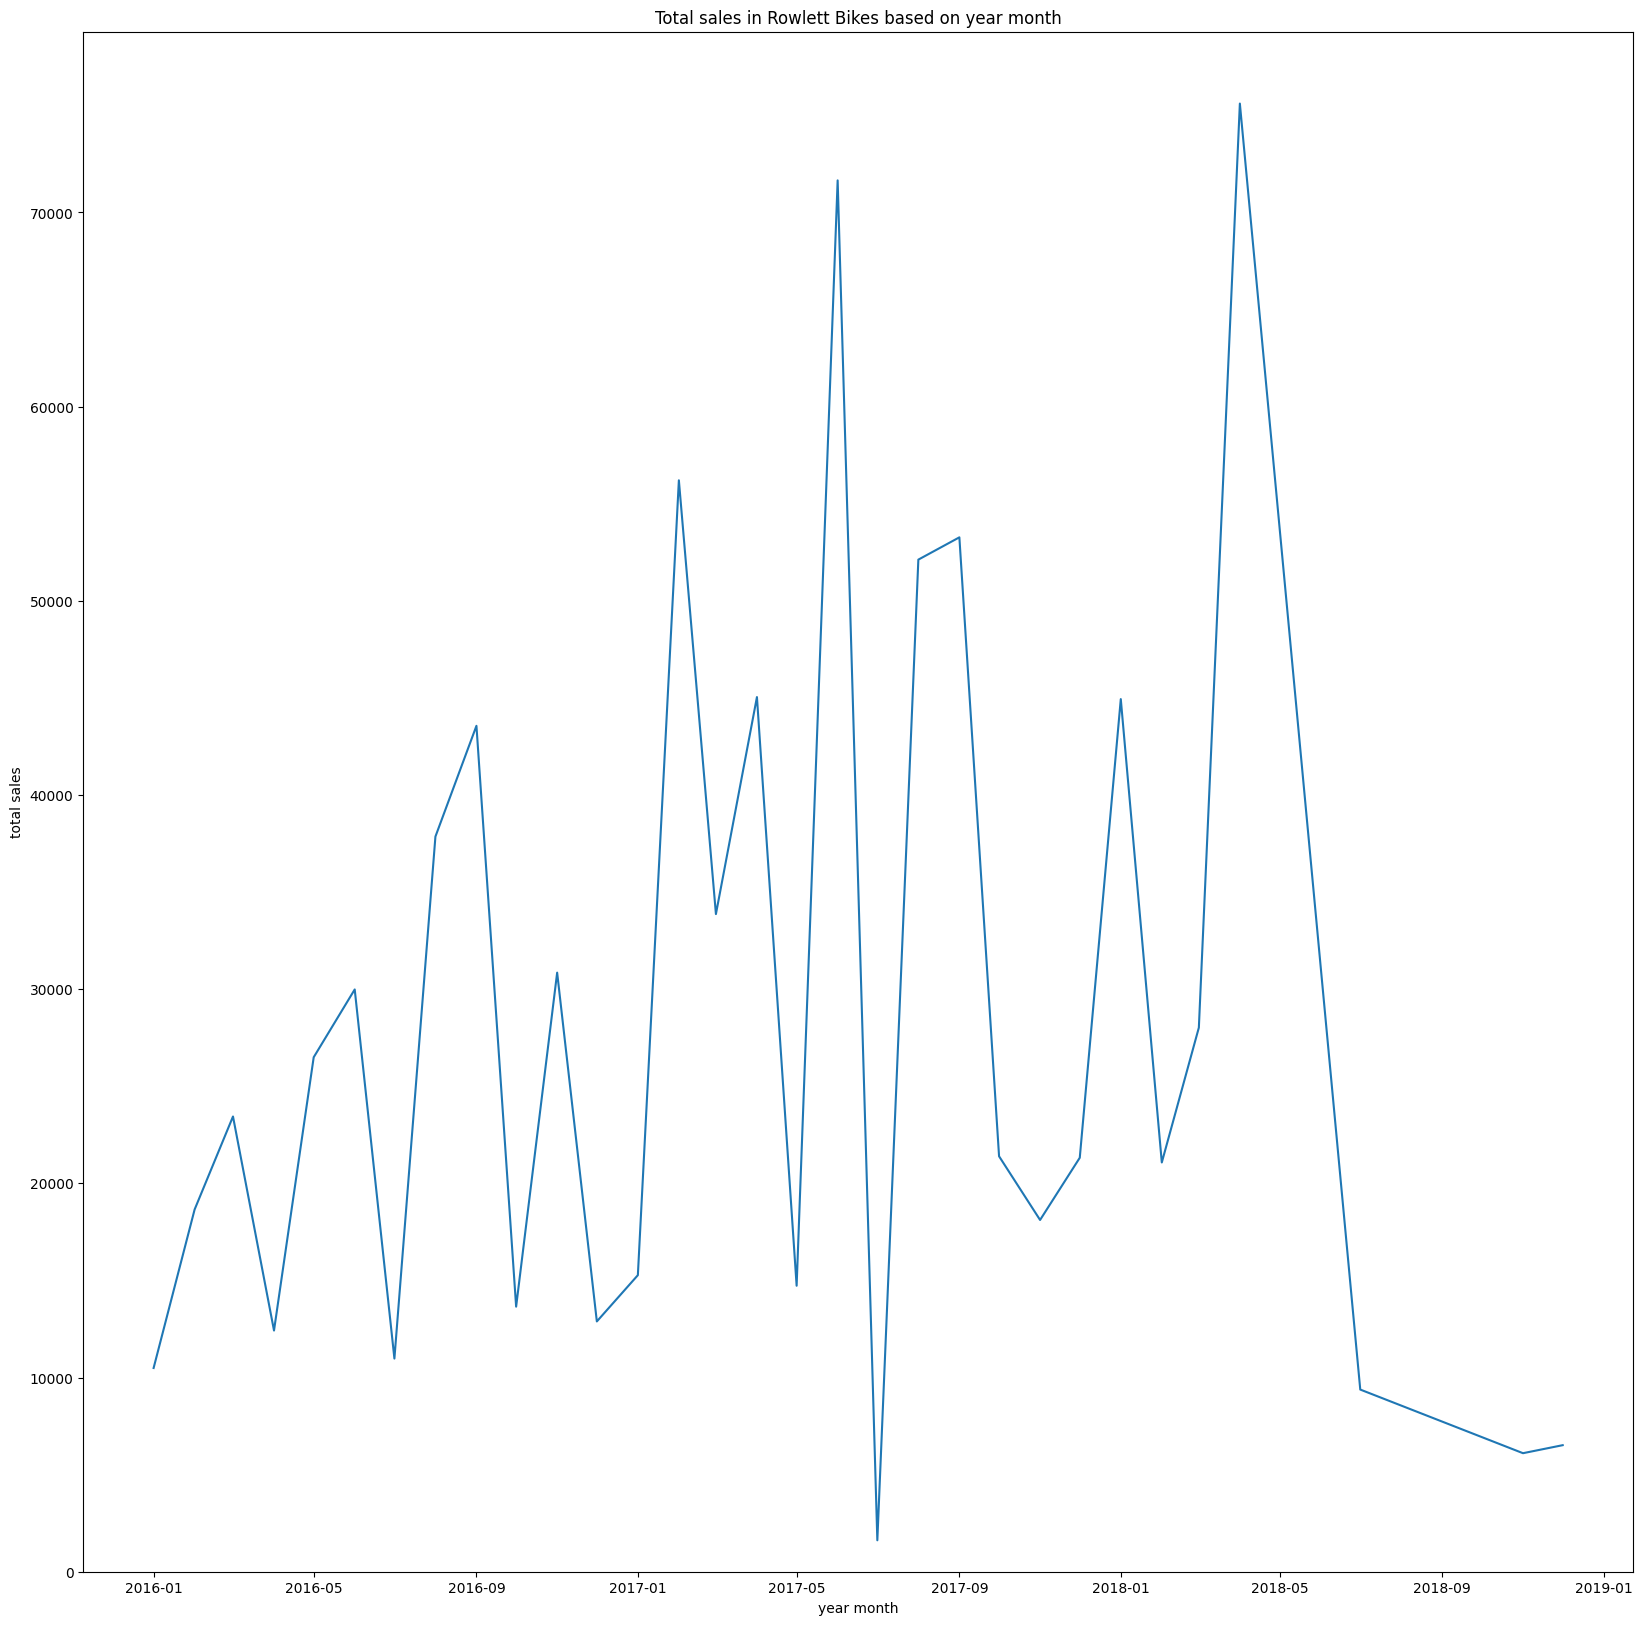

In [ ]:
plt.subplots(figsize=(20, 20))

plt.plot(result5['year_month'], result5['total_price'])
plt.title('Total sales in Rowlett Bikes based on year month')
plt.xlabel('year month')
plt.ylabel('total sales')
plt.ylim(bottom = 0)

plt.show()

In [ ]:
query6 = '''
SELECT staffs.staff_id, staffs.first_name, staffs.last_name, COUNT(orders.order_id) AS numberof_orders
FROM orders
JOIN staffs ON orders.staff_id = staffs.staff_id
GROUP BY staffs.staff_id
HAVING numberof_orders = (SELECT MAX(x)
                          FROM (SELECT s.staff_id, s.first_name, s.last_name, COUNT(o.order_id) AS x
                                FROM orders AS o
                                JOIN staffs AS s ON o.staff_id = s.staff_id
                                GROUP BY s.staff_id) AS y)
'''

result6 = pd.read_sql_query(query6, db)
result6

,staff_id,first_name,last_name,numberof_orders
0,6,Marcelene,Boyer,553


In [ ]:
query7 = '''
SELECT staffs.staff_id, staffs.first_name, staffs.last_name, COUNT(orders.order_id) AS numberof_orders
FROM orders
JOIN staffs ON orders.staff_id = staffs.staff_id
GROUP BY staffs.staff_id
HAVING numberof_orders = (SELECT MIN(x)
                          FROM (SELECT s.staff_id, s.first_name, s.last_name, COUNT(o.order_id) AS x
                                FROM orders AS o
                                JOIN staffs AS s ON o.staff_id = s.staff_id
                                GROUP BY s.staff_id) AS y)
'''

result7 = pd.read_sql_query(query7, db)
result7

,staff_id,first_name,last_name,numberof_orders
0,9,Layla,Terrell,86
